In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io, color, feature
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
dataset_dir = 'OASISDataset1/'

In [3]:
img_paths = []
labels = []

In [4]:
# Iterate over the directories in the dataset directory
for label in os.listdir(dataset_dir):
    label_dir = os.path.join(dataset_dir, label)
    if os.path.isdir(label_dir):
        # Iterate over the image files in each label directory
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            img_paths.append(img_path)
            labels.append(label)

In [5]:
# Preprocess images and compute HOG features
# Preprocess images and compute HOG features
hog_features = []
for img_path in img_paths:
    img = io.imread(img_path)
    if img.ndim == 3:  # Convert RGB to grayscale
        img = color.rgb2gray(img)
    hog_feature = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys')
    hog_features.append(hog_feature)


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)


                  precision    recall  f1-score   support

    MildDementia       0.95      0.96      0.96       177
ModerateDementia       0.98      1.00      0.99        44
     NonDemented       0.99      0.99      0.99       545
VeryMildDementia       0.99      0.98      0.98       284

        accuracy                           0.98      1050
       macro avg       0.98      0.98      0.98      1050
    weighted avg       0.98      0.98      0.98      1050



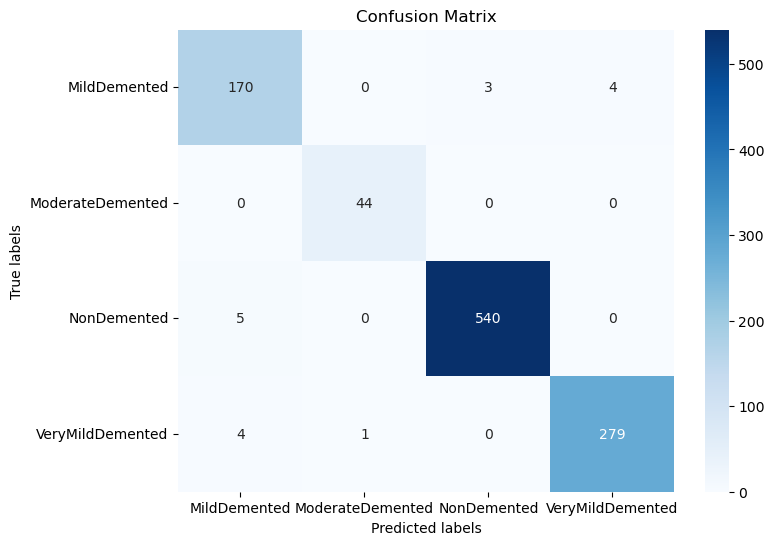

Accuracy for class 0: 0.96045197740113
Accuracy for class 1: 1.0
Accuracy for class 2: 0.9908256880733946
Accuracy for class 3: 0.9823943661971831


In [7]:
# Train SVM classifier for linear kernel
svm_classifier1 = SVC(kernel='linear')
svm_classifier1.fit(X_train, y_train)


# Predict on testing set
y_pred = svm_classifier1.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix1 = confusion_matrix(y_test, y_pred)

# Define your classes
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
# Calculate accuracy for each class
class_accuracy = conf_matrix1.diagonal() / conf_matrix1.sum(axis=1)

# Print accuracy for each class
for idx, accuracy in enumerate(class_accuracy):
    print(f"Accuracy for class {idx}: {accuracy}")

                  precision    recall  f1-score   support

    MildDementia       0.98      0.97      0.97       177
ModerateDementia       1.00      1.00      1.00        44
     NonDemented       0.99      1.00      1.00       545
VeryMildDementia       0.99      0.99      0.99       284

        accuracy                           0.99      1050
       macro avg       0.99      0.99      0.99      1050
    weighted avg       0.99      0.99      0.99      1050



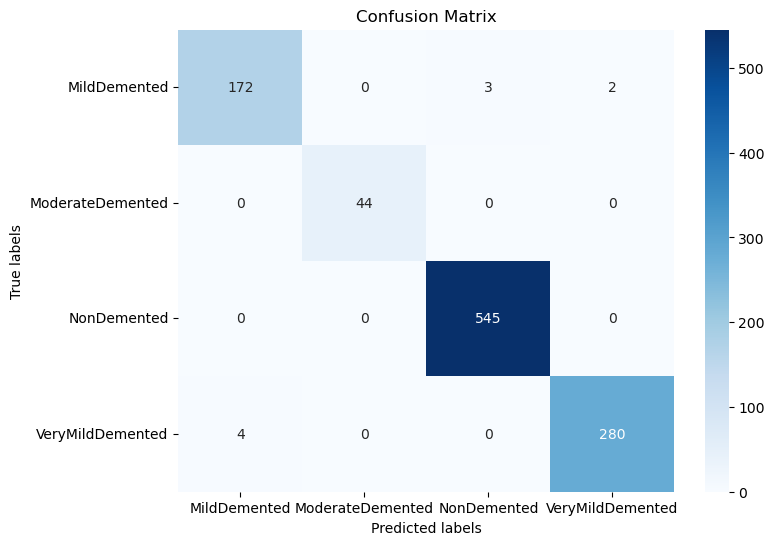

Accuracy for class 0: 0.9717514124293786
Accuracy for class 1: 1.0
Accuracy for class 2: 1.0
Accuracy for class 3: 0.9859154929577465


In [8]:
svm_classifier2 = SVC(kernel='rbf')
svm_classifier2.fit(X_train, y_train)

# Predict on testing set
y_pred = svm_classifier2.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred)

# Define your classes
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
# Calculate accuracy for each class
class_accuracy = conf_matrix2.diagonal() / conf_matrix2.sum(axis=1)

# Print accuracy for each class
for idx, accuracy in enumerate(class_accuracy):
    print(f"Accuracy for class {idx}: {accuracy}")

                  precision    recall  f1-score   support

    MildDementia       0.95      0.96      0.96       177
ModerateDementia       0.98      1.00      0.99        44
     NonDemented       0.99      0.99      0.99       545
VeryMildDementia       0.99      0.98      0.98       284

        accuracy                           0.98      1050
       macro avg       0.98      0.98      0.98      1050
    weighted avg       0.98      0.98      0.98      1050



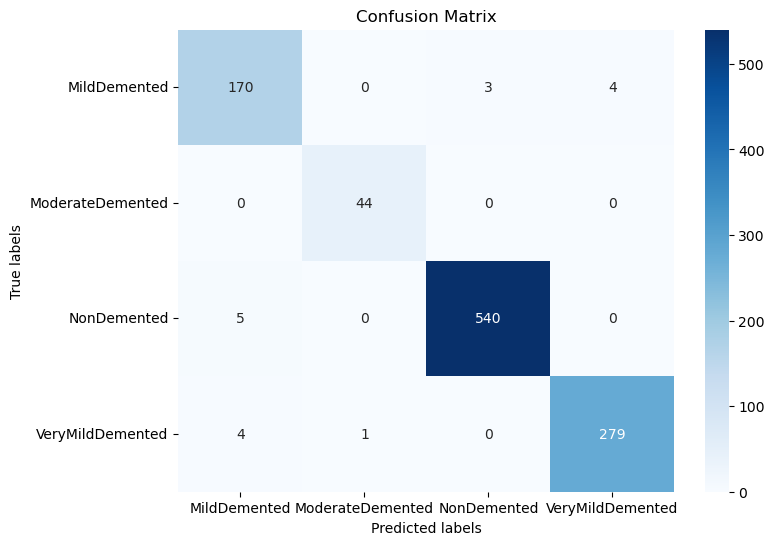

Accuracy for class 0: 0.96045197740113
Accuracy for class 1: 1.0
Accuracy for class 2: 0.9908256880733946
Accuracy for class 3: 0.9823943661971831


In [9]:
svm_classifier3 = SVC(kernel='poly', degree=3)
svm_classifier3.fit(X_train, y_train)

# Predict on testing set
y_pred = svm_classifier3.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix3 = confusion_matrix(y_test, y_pred)

# Define your classes
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
# Calculate accuracy for each class
class_accuracy = conf_matrix3.diagonal() / conf_matrix3.sum(axis=1)

# Print accuracy for each class
for idx, accuracy in enumerate(class_accuracy):
    print(f"Accuracy for class {idx}: {accuracy}")

In [10]:
# Evaluate the model
accuracy = svm_classifier1.score(X_test, y_test)
print("Accuracy for linear kernel:", accuracy)
accuracy = svm_classifier2.score(X_test, y_test)
print("Accuracy for rbf kernel:", accuracy)
accuracy = svm_classifier3.score(X_test, y_test)
print("Accuracy for poly kernel:", accuracy)


Accuracy for linear kernel: 0.9838095238095238
Accuracy for rbf kernel: 0.9914285714285714
Accuracy for poly kernel: 0.9838095238095238
